# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Berikut tautan dataset yang di dapatkan dari Kaggle: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
df = pd.read_csv('D:\Bootcamp\Laskar AI\Submission\Eksperimen_SML_Tiani\housing.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\inait\AppData\Local\Temp\ipykernel_4840\3864108655.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('D:\Bootcamp\Laskar AI\Submission\Eksperimen_SML_Tiani\housing.csv')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [30]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
# Cek duplikat
df.duplicated().sum()

np.int64(0)

In [4]:
# Cek missing value
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

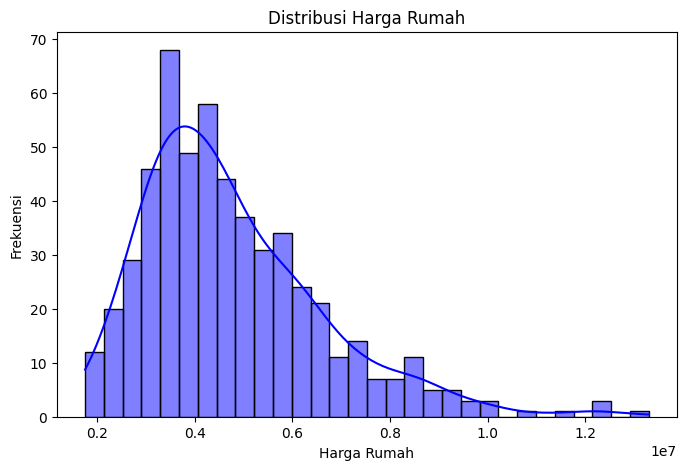

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.title("Distribusi Harga Rumah")
plt.xlabel("Harga Rumah")
plt.ylabel("Frekuensi")
plt.show()

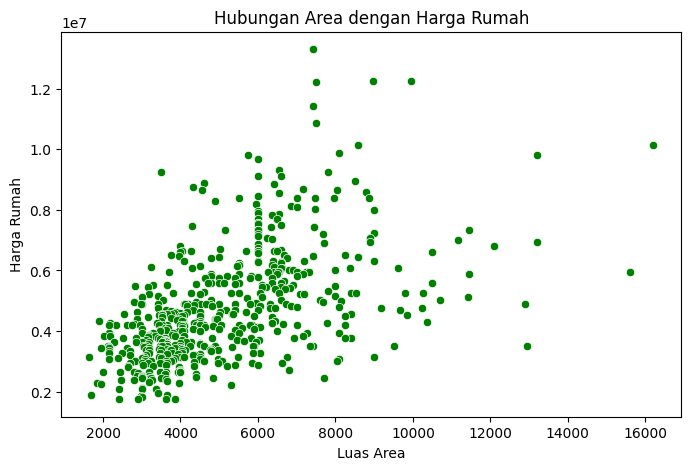

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["area"], y=df["price"], color="green")
plt.title("Hubungan Area dengan Harga Rumah")
plt.xlabel("Luas Area")
plt.ylabel("Harga Rumah")
plt.show()

C:\Users\inait\AppData\Local\Temp\ipykernel_1796\2933796993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["bedrooms"], y=df["price"], palette="Set2")


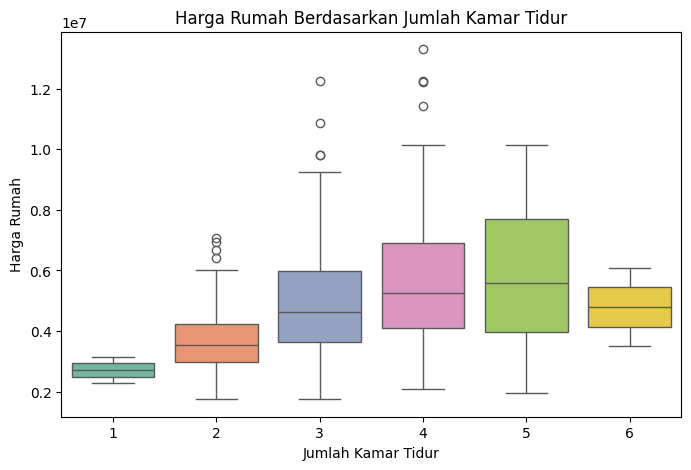

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["bedrooms"], y=df["price"], palette="Set2")
plt.title("Harga Rumah Berdasarkan Jumlah Kamar Tidur")
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("Harga Rumah")
plt.show()

C:\Users\inait\AppData\Local\Temp\ipykernel_1796\4056694718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["furnishingstatus"], palette="pastel")


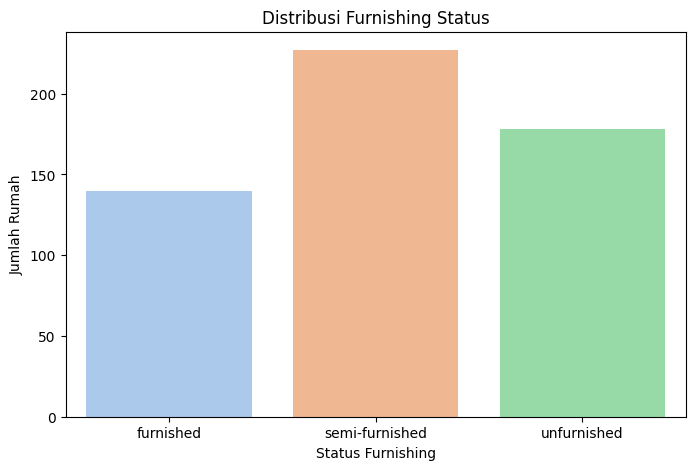

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["furnishingstatus"], palette="pastel")
plt.title("Distribusi Furnishing Status")
plt.xlabel("Status Furnishing")
plt.ylabel("Jumlah Rumah")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# Fitur numerik dan kategorik
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

# Target
target = 'price'

# Pisahkan fitur dan label
X = df.drop(columns=[target])
y = df[target]

In [8]:
# Buat preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Kolom transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Pipeline lengkap
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [9]:
# Terapkan preprocessing
X_processed = pipeline.fit_transform(X)

In [10]:
# Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
# Gabungkan kembali X dan y agar bisa disimpan dalam satu file
train = pd.DataFrame(X_train)
train['price'] = y_train.values

test = pd.DataFrame(X_test)
test['price'] = y_test.values

# Simpan ke dalam folder preprocessing/namadataset_preprocessing/
os.makedirs('D:/Bootcamp/Laskar AI/Submission/Eksperimen_SML_Tiani/preprocessing/namadataset_preprocessing', exist_ok=True)

train.to_csv('D:/Bootcamp/Laskar AI/Submission/Eksperimen_SML_Tiani/preprocessing/namadataset_preprocessing/train.csv', index=False)
test.to_csv('D:/Bootcamp/Laskar AI/Submission/Eksperimen_SML_Tiani/preprocessing/namadataset_preprocessing/test.csv', index=False)